<a href="https://colab.research.google.com/github/shyandsy/ModernComputerVisionWithPyTorch/blob/main/chapter1_%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E7%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch计算机视觉实践-chapter1 人工神经网络基础

## 整合向前传播向后传播
模型定义：
1. 输入层连接到一个隐藏层，盖层有3个单元
2. 隐藏层连接到输出层，该输出层有1个单元


epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9
epoch : 10
epoch : 11
epoch : 12
epoch : 13
epoch : 14
epoch : 15
epoch : 16
epoch : 17
epoch : 18
epoch : 19
epoch : 20
epoch : 21
epoch : 22
epoch : 23
epoch : 24
epoch : 25
epoch : 26
epoch : 27
epoch : 28
epoch : 29
epoch : 30
epoch : 31
epoch : 32
epoch : 33
epoch : 34
epoch : 35
epoch : 36
epoch : 37
epoch : 38
epoch : 39
epoch : 40
epoch : 41
epoch : 42
epoch : 43
epoch : 44
epoch : 45
epoch : 46
epoch : 47
epoch : 48
epoch : 49
epoch : 50
epoch : 51
epoch : 52
epoch : 53
epoch : 54
epoch : 55
epoch : 56
epoch : 57
epoch : 58
epoch : 59
epoch : 60
epoch : 61
epoch : 62
epoch : 63
epoch : 64
epoch : 65
epoch : 66
epoch : 67
epoch : 68
epoch : 69


Text(0, 0.5, 'Loss Value')

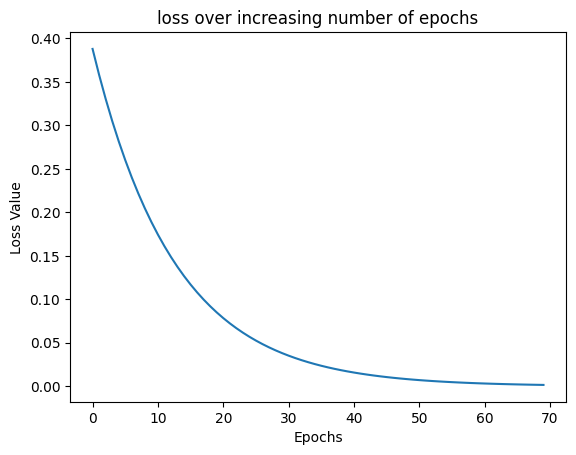

In [ ]:
from ast import increment_lineno
from copy import deepcopy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def feed_forward(inputs, outputs, weights):
  pre_hidden = np.dot(inputs, weights[0]) + weights[1]
  hidden = 1/(1+np.exp(-pre_hidden))
  pre_out = np.dot(hidden, weights[2]) + weights[3]
  mean_squared_error = np.mean(np.square(pre_out - outputs))
  return mean_squared_error


"""
inputs: 输入
"""
def feed_forward(inputs, outputs, weights):
  # inputs:     (n, 2)
  # weights[0]: (2, 3)
  # weights[1]: (1, 3)
  # ===> pre_hidden: (n, 3)
  pre_hidden = np.dot(inputs, weights[0]) + weights[1]
  # s型激活
  hidden = 1/(1+np.exp(-pre_hidden))
  # hidden:     (n, 3)
  # weights[2]: (3, 1)
  # weights[3]: (1, 1)
  # ===> pre_out: (n, 1)
  pre_out = np.dot(hidden, weights[2]) + weights[3]
  mse = np.mean(np.square(pre_out - outputs))
  return mse

def update_weights(inputs, outputs, weights, lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)

def update_weights(inputs, outputs, weights, lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)

  original_loss = feed_forward(inputs, outputs, original_weights)

  for i, layer in enumerate(original_weights):
    for index, weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001
      _loss_plus = feed_forward(inputs, outputs, temp_weights)
      grad = (_loss_plus - original_loss) / 0.0001
      updated_weights[i][index] -= grad * lr

  return updated_weights, original_loss


x = np.array([
  [1,1]
])
y = np.array([
  [0]
])

# 随机初始化权重和偏置项
# 隐藏层3个单元：每个输入节点和每个隐藏层单元相连。因此，总共有6个权重值和3个偏置项
# 其中，1个偏置和2个权重（2个权重来自于2个输入节点）对映每个隐藏单元
# 另外，最后1层有1个单元连接到隐藏层的3个单元，
# 因此，输入层的值有3个权重和1个偏置项决定
# 2个权重和1个偏执对映1个隐藏单元
W = [
    # 全连接层2*3权重矩阵
    np.array([
        [-0.0053, 0.3793],
        [-0.5820, 0.5204],
        [-0.2723, 0.1896]
      ], dtype=np.float32).T,
    # 与隐藏层每个节点相关联的偏置项
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[0.1528, -0.1745, -0.1136]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

losses = []
for epoch in range(70):
  W, loss = update_weights(x, y, W, 0.01)
  losses.append(loss)

plt.plot(losses)
plt.title('loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')





In [ ]:
import numpy as np

print(np.array([[0.1528, -0.1745, -0.1136]], dtype=np.float32).T)

[[ 0.1528]
 [-0.1745]
 [-0.1136]]
